**Setup YOLOv9 repository and environment**

In [1]:
# Get Home directory

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Clone yolov9 repository and setup the environment

!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 7.90 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 12.4 MB/s eta 0:00:00


In [3]:
# Install roboflow

!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 794.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Download gelan-c pretrained model weights

# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Jul  6 05:08 .
drwxr-xr-x 1 root root      4096 Jul  6 05:08 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


**Download Traffic Detection Dataset**

In [4]:
%cd /content/yolov9

/content/yolov9


In [5]:
from google.colab import files

# Upload the file to Google Colab.
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
! chmod 600 /content/yolov9/kaggle.json
! kaggle datasets download yusufberksardoan/traffic-detection-project

Dataset URL: https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project
License(s): CC-BY-NC-SA-4.0
 98% 571M/583M [00:08<00:00, 15.9MB/s]
100% 583M/583M [00:08<00:00, 73.1MB/s]


In [7]:
! unzip traffic-detection-project.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/ant_sales-12020_png_jpg.rf.116c568e2fa6537db6abb213ea9bd88c.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.59c39ca227b58e13c54959a8edef0001.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.9c4cf0ef1bcc1e09a508ff3bc020c503.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.a40f6b1a5ae047f13a5576acde754ae4.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.f4b4f0a44f4210cebb9cb9ab3bedce23.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.81d9ef94ea17cbba2690830f87e64d7b.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.a4f8564b6e4976796e3793ba5192a388.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.c92e5162026aa26821964cf7d3a5ad17.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.081cb89981eb32d3875f22a3f20c7da6.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.33034b367dd9509b2ba7f594d9093018.txt  
  inflating: train/labels/ant

**Train the Model**

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 60 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-07-06 08:00:33.860721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 08:00:33.860792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 08:00:33.979826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 08:00:34.205156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 08:00:36.360727: W

In [ ]:
# Following two cells are to zip and download the experiments results
! zip -r /content/yolov9/runs.zip /content/yolov9/runs

  adding: content/yolov9/runs/ (stored 0%)
  adding: content/yolov9/runs/train/ (stored 0%)
  adding: content/yolov9/runs/train/exp/ (stored 0%)
  adding: content/yolov9/runs/train/exp/labels_correlogram.jpg (deflated 31%)
  adding: content/yolov9/runs/train/exp/train_batch1.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp/val_batch1_labels.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp/results.png (deflated 11%)
  adding: content/yolov9/runs/train/exp/val_batch1_pred.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp/train_batch2.jpg (deflated 3%)
  adding: content/yolov9/runs/train/exp/F1_curve.png (deflated 9%)
  adding: content/yolov9/runs/train/exp/val_batch0_labels.jpg (deflated 6%)
  adding: content/yolov9/runs/train/exp/P_curve.png (deflated 12%)
  adding: content/yolov9/runs/train/exp/events.out.tfevents.1720252837.5cf946d743d8.1488.0 (deflated 53%)
  adding: content/yolov9/runs/train/exp/val_batch0_pred.jpg (deflated 6%)
  adding: content/yolov9/run

In [ ]:
from google.colab import files

# Download the file from the specified path
files.download("/content/yolov9/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Analyse Results**

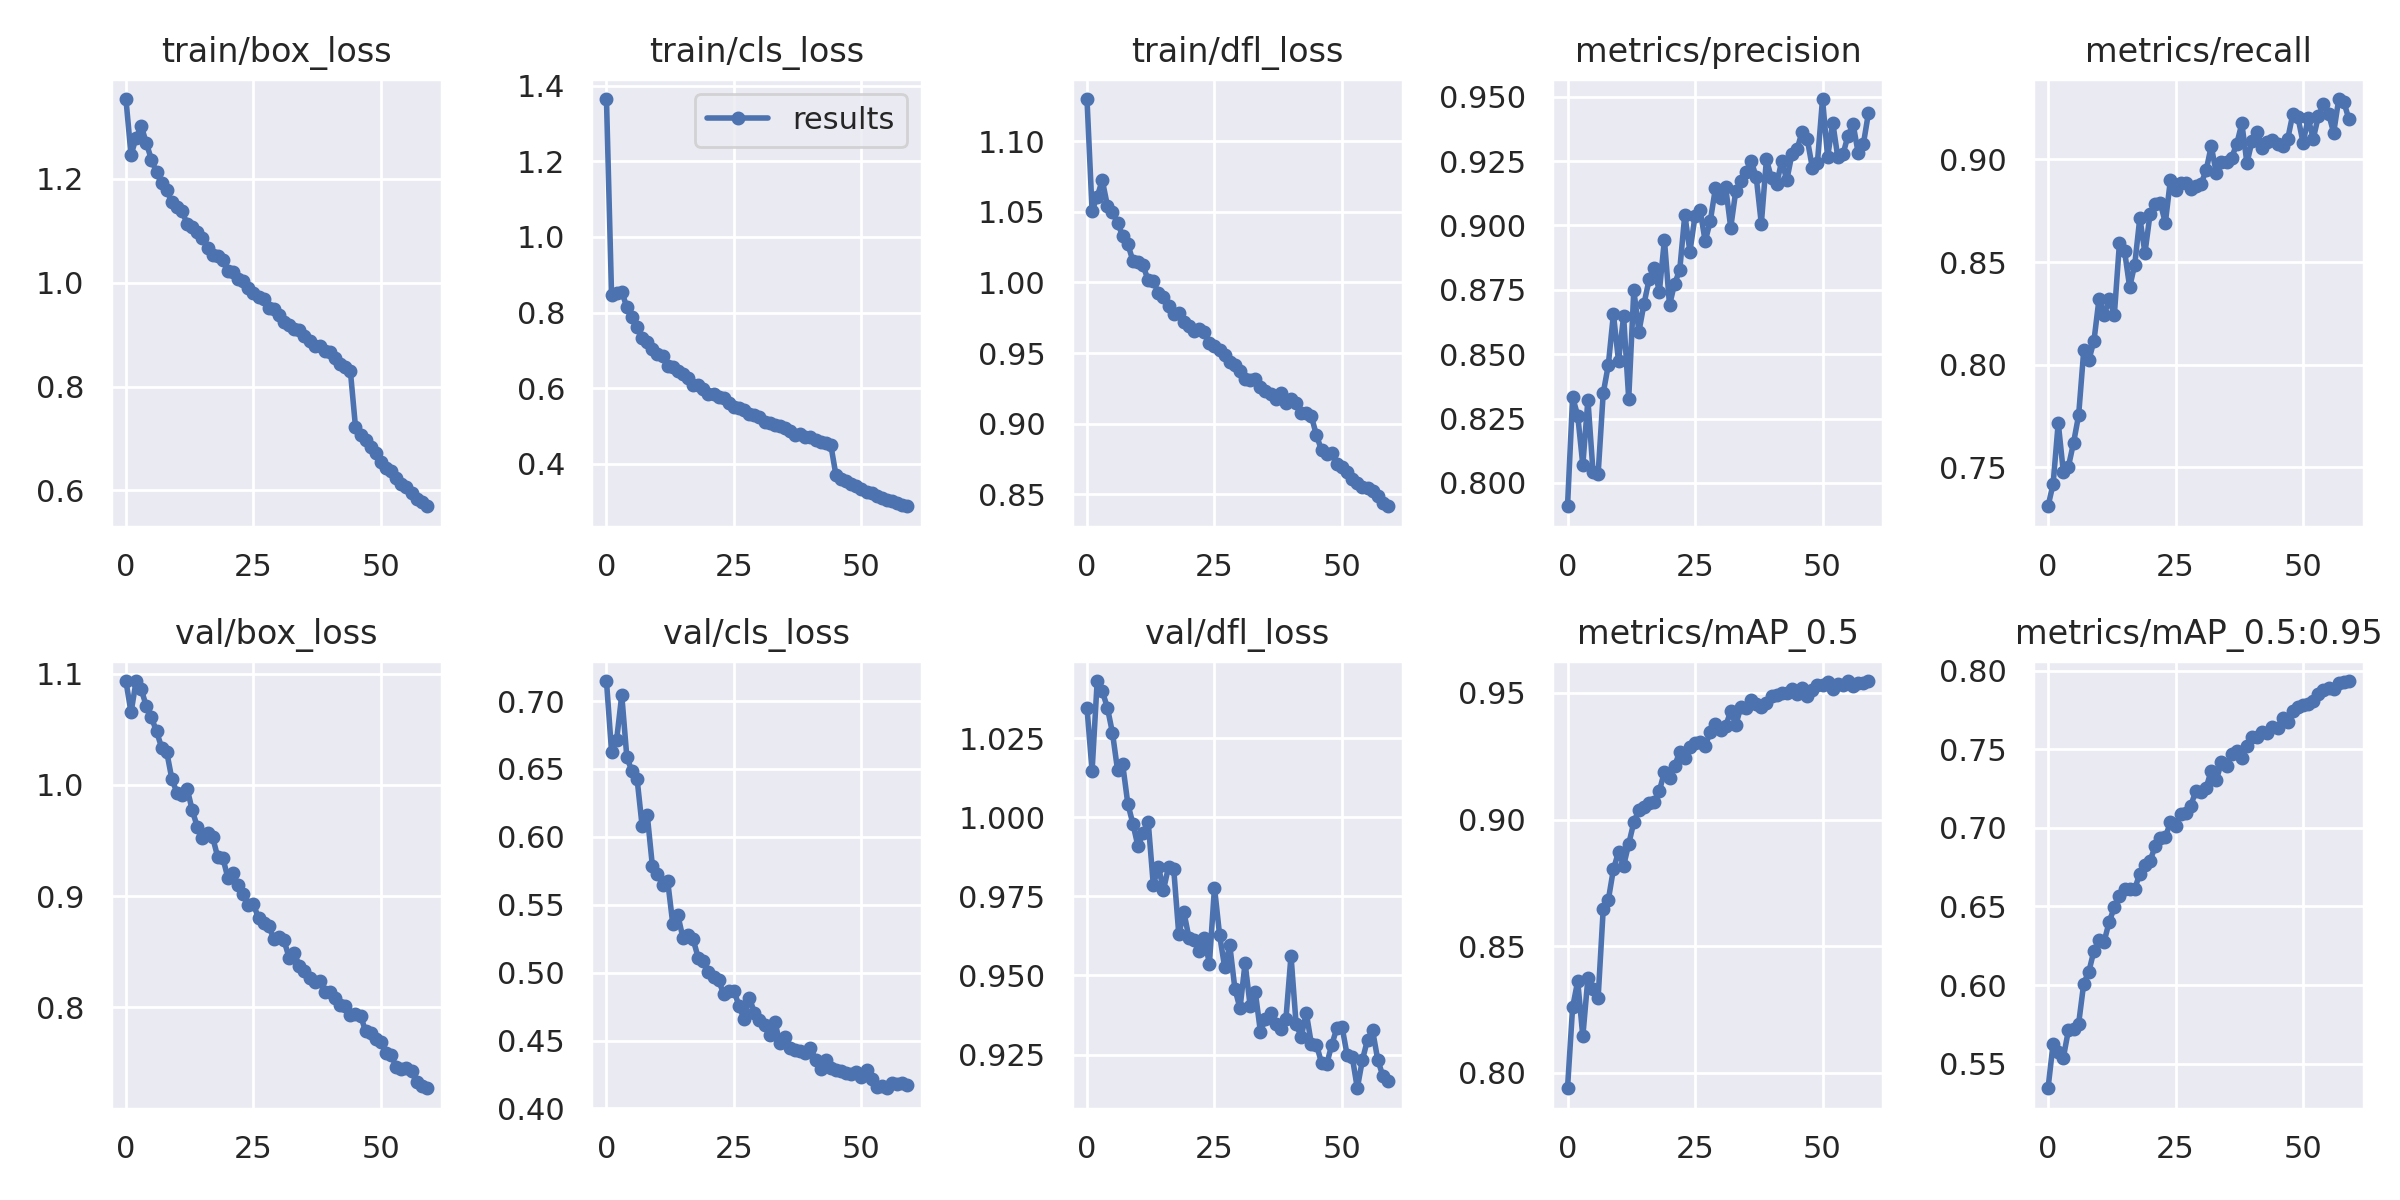

In [16]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

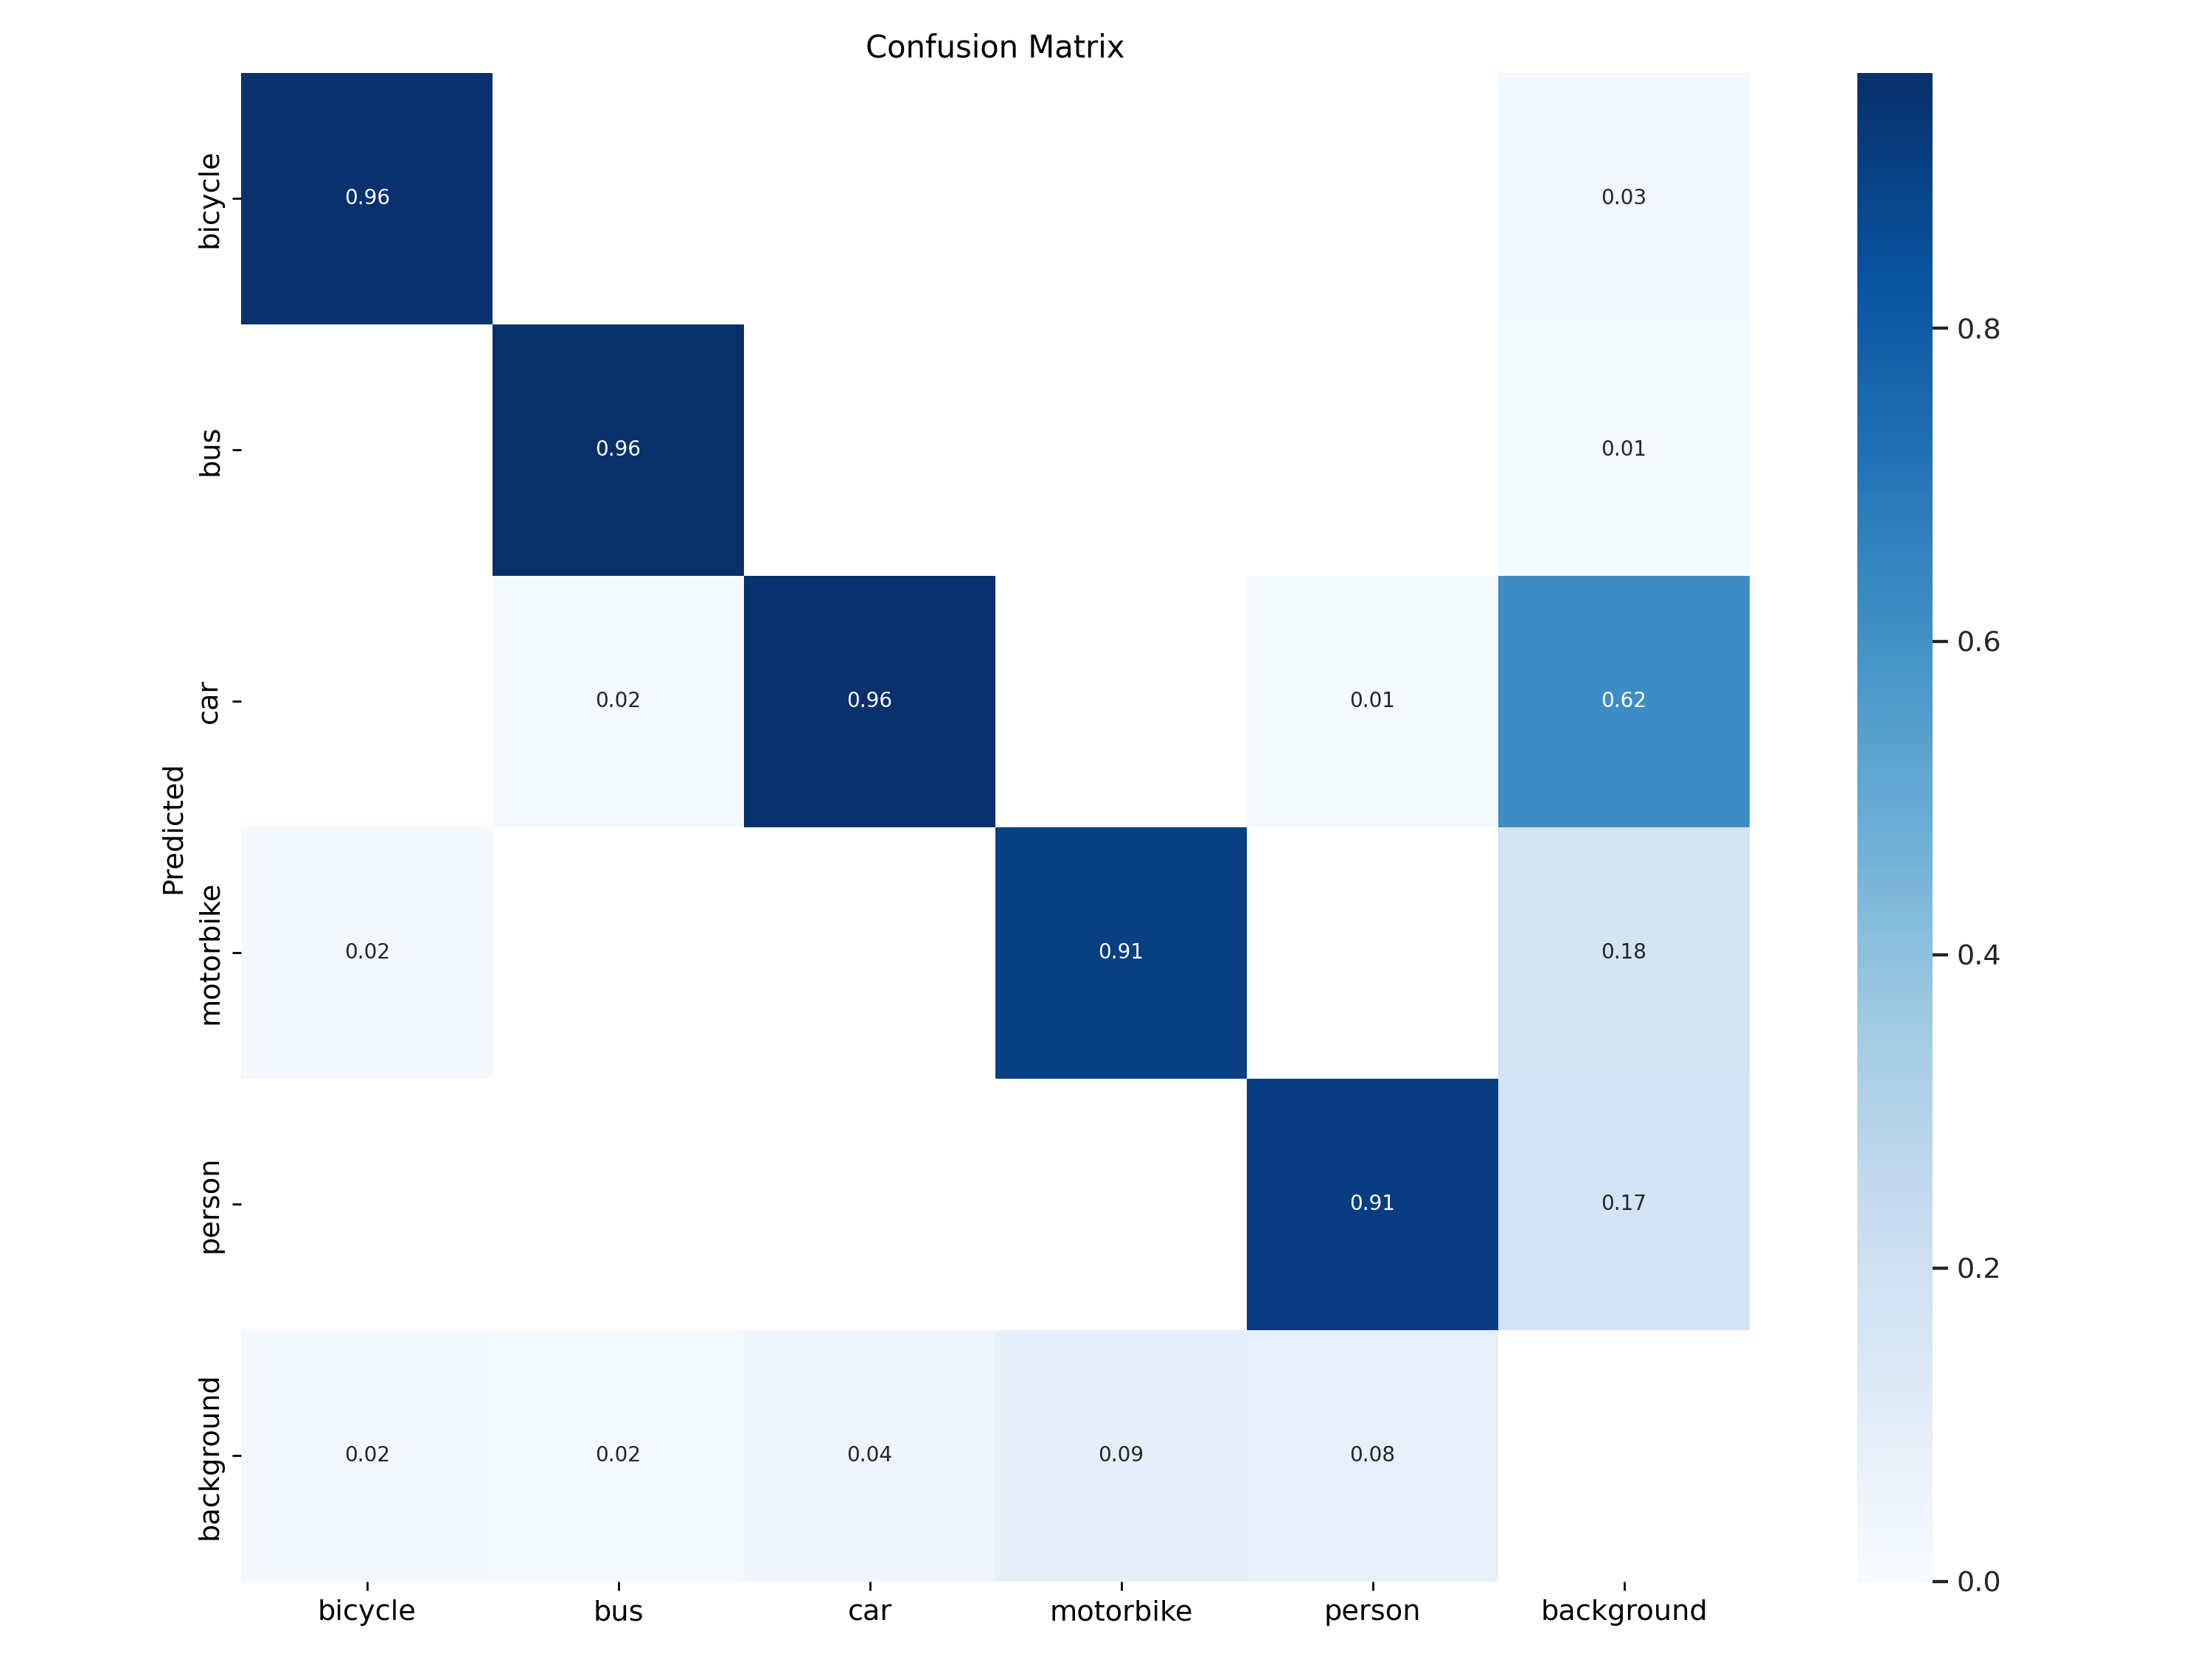

In [17]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

**Validate Model**

In [20]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/yolov9/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100% 549/549 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 18/18 [00:31<00:00,  1.75s/it]
                   all        549       6270      0.944       0.92      0.955      0.795
               bicycle        549        250      0.957      0.956      0.959   

**Inference Model on GPU**

In [22]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/yolov9/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/279 /content/yolov9/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 14 cars, 1 motorbike, 1 person, 51.7ms
image 2/279 /content/yolov9/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 16 cars, 5 motorbikes, 42.4ms
image 3/279 

In [32]:
inference_time = (0.5 + 26.4 + 3.5) * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {0.5 + 26.4 + 3.5}ms")
print(f"FPS = {FPS}")

Total Interfence time = 30.4ms
FPS = 32.89473684210526


**Inference Model on CPU**

In [21]:
!python detect.py \
--img 640 --conf 0.1 --device cpu \
--weights /content/yolov9/runs/content/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/yolov9/test/images

detect: weights=['/content/yolov9/runs/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/279 /content/yolov9/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 14 cars, 1 motorbike, 1 person, 2595.6ms
image 2/279 /content/yolov9/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 16 cars, 5 motorbikes, 2376.5ms
image 3/27

In [22]:
inference_time_ms = (1.7 + 2643.0 + 1.3)
inference_time = inference_time_ms * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {inference_time_ms}ms")
print(f"FPS = {FPS}")

Total Interfence time = 2646.0ms
FPS = 0.3779289493575208


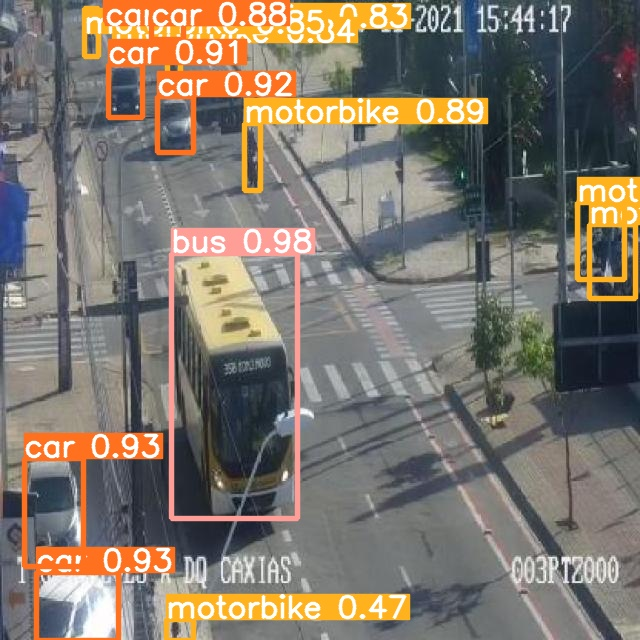

In [30]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[40:41]:
      display(Image(filename=image_path, width=600))